# Experimentation Boston House Prices - Aidan O'Connor - G00364756

## Contents

1.  Create Neural Network
2.  Experiment with different Pre-processing Scalers

In [1]:
# Loading Python packages.
import sklearn as sk
import pandas as pd
import numpy as np
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from sklearn.linear_model import LinearRegression
from scipy.stats import median_test
%matplotlib inline

# Loading Boston House Prices Dataset from scikit-learn.
# Adapted from:- [2](References) https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston
boston = load_boston()

### Extracting the dataset from the dictionary

In [2]:
# Adapted from https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
# Need to convert the dataset to a pandas dataframe to perform exploratory analysis

# Creating a dataframe from the boston house prices dictionary
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Appending the target "MEDV" to the dataframe, which represents the median house price in '000s.
df['PRICE'] = (pd.Series(boston.target))

In [3]:
# Determining what the acronyms stand form in relation to this dataset by printing DESCR attribute.
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Constructing the Neural Network Model

In [4]:
# Adapted from:- https://keras.io/#getting-started-30-seconds-to-keras
# and also from Dr. Ian McGloughlin's jupyter notebooks and lectures.

# Importing Keras
import keras as kr
from sklearn import preprocessing as prep
from sklearn import decomposition as dec

Using TensorFlow backend.


In [5]:
#Adapted from: https://medium.com/themlblog/multivariate-regression-using-deep-neural-networks-in-tensorflow-f94f42a148b3

# Set y to Price
y = df['PRICE']

# Set x to whole Boston House Prices Dataset minus the Price column
x = df.drop("PRICE",axis=1)

### Split dataset into training and test subsets

In [6]:
# Adapted from:- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Adapted from:-Using a validation set - https://datascience.stackexchange.com/questions/18339/why-use-both-validation-set-and-test-set

# Use scikit learn to split the dataset into a training set and a test set
#x_train, x_test, y_train, y_test= mod.train_test_split(x, y, test_size=0.25, random_state=42)
x_train, x_val_and_test, y_train, y_val_and_test = mod.train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = mod.train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

### Create the Neural Network and set its parameters

In [7]:
# Adapted from:- https://keras.io/#getting-started-30-seconds-to-keras
# and also from Dr. Ian McGloughlin's jupyter notebooks and lectures.

# Create a neural network using keras
m = kr.models.Sequential()

# Add layers to of nurons to the network and add activation functions that are appropriate for the model
m.add(kr.layers.Dense(50, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(100, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(50, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, input_dim=13, activation="linear"))

# Compile the neural network using a suitable optimiser to imporve the model each time it is trained
m.compile(loss="mean_squared_error", optimizer="adam",  metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Train the Neural Network

In [8]:
# Train the neural network.
boston_model = m.fit(x_train, y_train, epochs=250, batch_size=20, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 354 samples, validate on 76 samples
Epoch 1/250
354/354 [==============================] - 0s 647us/step - loss: 1725.0851 - accuracy: 0.0000e+00 - val_loss: 557.4859 - val_accuracy: 0.0000e+00
Epoch 2/250
354/354 [==============================] - 0s 70us/step - loss: 196.6831 - accuracy: 0.0085 - val_loss: 68.9200 - val_accuracy: 0.0132
Epoch 3/250
354/354 [==============================] - 0s 82us/step - loss: 88.6408 - accuracy: 0.0028 - val_loss: 56.1564 - val_accuracy: 0.0000e+00
Epoch 4/250
354/354 [==============================] - 0s 73us/step - loss: 73.1409 - accuracy: 0.0056 - val_loss: 42.3482 - val_accuracy: 0.0132
Epoch 5/250
354/354 [==============================] - 0s 73us/step - loss: 70.9362 - accuracy: 0.0028 - val_loss: 44.2886 - val_accuracy: 0.0000e+00
Epoch 6/250
354/354 [==============================] - 0s 76us/step - loss: 69.4195 - accuracy: 0.0000e+00 - val_loss: 45.9550 - val_accuracy: 0.0000e+00
Ep

Epoch 54/250
354/354 [==============================] - 0s 73us/step - loss: 29.7071 - accuracy: 0.0169 - val_loss: 24.6683 - val_accuracy: 0.0263
Epoch 55/250
354/354 [==============================] - 0s 93us/step - loss: 27.8453 - accuracy: 0.0198 - val_loss: 22.0913 - val_accuracy: 0.0263
Epoch 56/250
354/354 [==============================] - 0s 79us/step - loss: 28.0293 - accuracy: 0.0056 - val_loss: 21.7415 - val_accuracy: 0.0000e+00
Epoch 57/250
354/354 [==============================] - 0s 70us/step - loss: 28.2205 - accuracy: 0.0198 - val_loss: 23.7612 - val_accuracy: 0.0132
Epoch 58/250
354/354 [==============================] - 0s 73us/step - loss: 27.2679 - accuracy: 0.0113 - val_loss: 22.5949 - val_accuracy: 0.0132
Epoch 59/250
354/354 [==============================] - 0s 79us/step - loss: 26.7011 - accuracy: 0.0113 - val_loss: 26.1080 - val_accuracy: 0.0526
Epoch 60/250
354/354 [==============================] - 0s 82us/step - loss: 26.2291 - accuracy: 0.0198 - val_loss

354/354 [==============================] - 0s 76us/step - loss: 16.5753 - accuracy: 0.0113 - val_loss: 18.2666 - val_accuracy: 0.0132
Epoch 110/250
354/354 [==============================] - 0s 65us/step - loss: 16.4973 - accuracy: 0.0169 - val_loss: 16.8758 - val_accuracy: 0.0132
Epoch 111/250
354/354 [==============================] - 0s 76us/step - loss: 18.2699 - accuracy: 0.0085 - val_loss: 21.9352 - val_accuracy: 0.0132
Epoch 112/250
354/354 [==============================] - 0s 73us/step - loss: 17.0920 - accuracy: 0.0169 - val_loss: 20.3688 - val_accuracy: 0.0132
Epoch 113/250
354/354 [==============================] - 0s 73us/step - loss: 17.5023 - accuracy: 0.0141 - val_loss: 17.8136 - val_accuracy: 0.0263
Epoch 114/250
354/354 [==============================] - 0s 68us/step - loss: 16.8162 - accuracy: 0.0113 - val_loss: 19.7588 - val_accuracy: 0.0132
Epoch 115/250
354/354 [==============================] - 0s 90us/step - loss: 15.6968 - accuracy: 0.0141 - val_loss: 17.6432 -

Epoch 164/250
354/354 [==============================] - 0s 73us/step - loss: 13.5193 - accuracy: 0.0254 - val_loss: 18.7499 - val_accuracy: 0.0132
Epoch 165/250
354/354 [==============================] - 0s 73us/step - loss: 14.4998 - accuracy: 0.0113 - val_loss: 16.1801 - val_accuracy: 0.0000e+00
Epoch 166/250
354/354 [==============================] - 0s 82us/step - loss: 19.7891 - accuracy: 0.0226 - val_loss: 19.3515 - val_accuracy: 0.0132
Epoch 167/250
354/354 [==============================] - 0s 82us/step - loss: 19.8901 - accuracy: 0.0113 - val_loss: 16.3661 - val_accuracy: 0.0000e+00
Epoch 168/250
354/354 [==============================] - 0s 93us/step - loss: 15.9000 - accuracy: 0.0282 - val_loss: 15.6575 - val_accuracy: 0.0263
Epoch 169/250
354/354 [==============================] - 0s 82us/step - loss: 14.0524 - accuracy: 0.0056 - val_loss: 17.7399 - val_accuracy: 0.0395
Epoch 170/250
354/354 [==============================] - 0s 87us/step - loss: 15.2568 - accuracy: 0.0141

354/354 [==============================] - 0s 79us/step - loss: 14.9881 - accuracy: 0.0141 - val_loss: 21.7508 - val_accuracy: 0.0132
Epoch 219/250
354/354 [==============================] - 0s 73us/step - loss: 13.6690 - accuracy: 0.0226 - val_loss: 15.1303 - val_accuracy: 0.0132
Epoch 220/250
354/354 [==============================] - 0s 76us/step - loss: 14.2844 - accuracy: 0.0113 - val_loss: 14.5941 - val_accuracy: 0.0263
Epoch 221/250
354/354 [==============================] - 0s 79us/step - loss: 13.1251 - accuracy: 0.0254 - val_loss: 15.7496 - val_accuracy: 0.0132
Epoch 222/250
354/354 [==============================] - 0s 90us/step - loss: 14.6931 - accuracy: 0.0113 - val_loss: 23.4164 - val_accuracy: 0.0132
Epoch 223/250
354/354 [==============================] - 0s 73us/step - loss: 17.7449 - accuracy: 0.0141 - val_loss: 15.4967 - val_accuracy: 0.0132
Epoch 224/250
354/354 [==============================] - 0s 87us/step - loss: 14.6825 - accuracy: 0.0254 - val_loss: 14.7978 -

### Use the Neural Network model to predict the values for the test subset and evaluate the model

In [9]:
# Run each x test value through the neural network. (Not using this currently but can print out the values of p_test if you want)
p_test = m.predict(x_test)
#p_test

# Evaluate the prediction - The first element is the loss, the second element is the accuracy
Eval = m.evaluate(x_test, y_test)
print("\nLoss is: ", Eval[0], "\nAccuracy is: ", Eval[1])

76/76 [==============================] - 0s 39us/step

Loss is:  24.122691204673366 
Accuracy is:  0.02631578966975212


### Determining whether Overfitting is occuring and determing the accuracy of the model

#### Graphing the training loss vs the validation loss

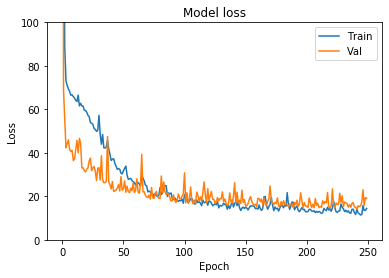

In [10]:
#Adapted from: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

plt.plot(boston_model.history['loss'])
plt.plot(boston_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0, 100)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Accuracy of the model

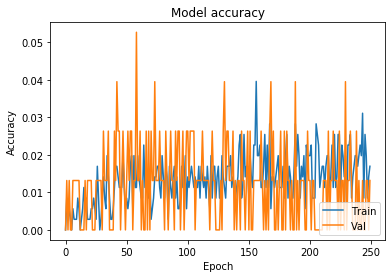

In [11]:
plt.plot(boston_model.history['accuracy'])
plt.plot(boston_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Trying to improve the Neural Network Model
### Scaling

In [12]:
# Adapted from https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

# Initiating the preprocessing scaler
scaler = prep.RobustScaler()
scaler.fit(x_train)

# Normalising the x train subset
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x.columns)

# Normalising the x test subset
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x.columns)

# Normalising the x validation subset
x_val_scaled = pd.DataFrame(scaler.transform(x_val), columns=x.columns)

#### Fit the scaled data to the model

In [13]:
boston_model_scaled = m.fit(x_train_scaled, y_train, epochs=250, batch_size=20, validation_data=(x_val_scaled,y_val))

Train on 354 samples, validate on 76 samples
Epoch 1/250
354/354 [==============================] - 0s 96us/step - loss: 450.3034 - accuracy: 0.0000e+00 - val_loss: 277.0244 - val_accuracy: 0.0000e+00
Epoch 2/250
354/354 [==============================] - 0s 68us/step - loss: 166.9159 - accuracy: 0.0028 - val_loss: 88.0646 - val_accuracy: 0.0000e+00
Epoch 3/250
354/354 [==============================] - 0s 90us/step - loss: 76.2390 - accuracy: 0.0056 - val_loss: 34.0000 - val_accuracy: 0.0263
Epoch 4/250
354/354 [==============================] - 0s 99us/step - loss: 39.5324 - accuracy: 0.0085 - val_loss: 20.9540 - val_accuracy: 0.0000e+00
Epoch 5/250
354/354 [==============================] - 0s 87us/step - loss: 28.2923 - accuracy: 0.0056 - val_loss: 17.1815 - val_accuracy: 0.0132
Epoch 6/250
354/354 [==============================] - 0s 90us/step - loss: 22.6924 - accuracy: 0.0113 - val_loss: 16.3874 - val_accuracy: 0.0132
Epoch 7/250
354/354 [==============================] - 0s 90

354/354 [==============================] - 0s 79us/step - loss: 5.8785 - accuracy: 0.0169 - val_loss: 9.5112 - val_accuracy: 0.0263
Epoch 57/250
354/354 [==============================] - 0s 87us/step - loss: 5.9958 - accuracy: 0.0198 - val_loss: 11.1911 - val_accuracy: 0.0132
Epoch 58/250
354/354 [==============================] - 0s 73us/step - loss: 6.0906 - accuracy: 0.0254 - val_loss: 9.9832 - val_accuracy: 0.0132
Epoch 59/250
354/354 [==============================] - 0s 70us/step - loss: 5.5962 - accuracy: 0.0226 - val_loss: 9.4234 - val_accuracy: 0.0132
Epoch 60/250
354/354 [==============================] - 0s 79us/step - loss: 5.8504 - accuracy: 0.0254 - val_loss: 9.5239 - val_accuracy: 0.0132
Epoch 61/250
354/354 [==============================] - 0s 70us/step - loss: 5.6760 - accuracy: 0.0254 - val_loss: 9.5420 - val_accuracy: 0.0132
Epoch 62/250
354/354 [==============================] - 0s 73us/step - loss: 5.5363 - accuracy: 0.0198 - val_loss: 10.2108 - val_accuracy: 0.0

354/354 [==============================] - 0s 90us/step - loss: 3.8093 - accuracy: 0.0395 - val_loss: 9.8667 - val_accuracy: 0.0000e+00
Epoch 112/250
354/354 [==============================] - 0s 79us/step - loss: 3.9145 - accuracy: 0.0226 - val_loss: 10.0320 - val_accuracy: 0.0132
Epoch 113/250
354/354 [==============================] - 0s 82us/step - loss: 3.6708 - accuracy: 0.0424 - val_loss: 9.5115 - val_accuracy: 0.0000e+00
Epoch 114/250
354/354 [==============================] - 0s 70us/step - loss: 3.9519 - accuracy: 0.0311 - val_loss: 10.0275 - val_accuracy: 0.0000e+00
Epoch 115/250
354/354 [==============================] - 0s 65us/step - loss: 4.1511 - accuracy: 0.0254 - val_loss: 9.7667 - val_accuracy: 0.0000e+00
Epoch 116/250
354/354 [==============================] - 0s 73us/step - loss: 3.6379 - accuracy: 0.0395 - val_loss: 9.6612 - val_accuracy: 0.0000e+00
Epoch 117/250
354/354 [==============================] - 0s 65us/step - loss: 3.6738 - accuracy: 0.0311 - val_loss: 

Epoch 166/250
354/354 [==============================] - 0s 79us/step - loss: 2.8099 - accuracy: 0.0508 - val_loss: 9.8111 - val_accuracy: 0.0000e+00
Epoch 167/250
354/354 [==============================] - 0s 82us/step - loss: 2.7277 - accuracy: 0.0424 - val_loss: 9.7944 - val_accuracy: 0.0000e+00
Epoch 168/250
354/354 [==============================] - 0s 73us/step - loss: 2.9444 - accuracy: 0.0508 - val_loss: 9.7299 - val_accuracy: 0.0000e+00
Epoch 169/250
354/354 [==============================] - 0s 65us/step - loss: 2.7661 - accuracy: 0.0282 - val_loss: 10.0062 - val_accuracy: 0.0000e+00
Epoch 170/250
354/354 [==============================] - 0s 70us/step - loss: 2.7943 - accuracy: 0.0452 - val_loss: 9.7164 - val_accuracy: 0.0000e+00
Epoch 171/250
354/354 [==============================] - 0s 70us/step - loss: 2.7695 - accuracy: 0.0480 - val_loss: 9.7032 - val_accuracy: 0.0000e+00
Epoch 172/250
354/354 [==============================] - 0s 73us/step - loss: 2.6965 - accuracy: 0.

Epoch 221/250
354/354 [==============================] - 0s 96us/step - loss: 2.2548 - accuracy: 0.0452 - val_loss: 10.2874 - val_accuracy: 0.0132
Epoch 222/250
354/354 [==============================] - 0s 82us/step - loss: 2.3305 - accuracy: 0.0650 - val_loss: 9.6942 - val_accuracy: 0.0132
Epoch 223/250
354/354 [==============================] - 0s 96us/step - loss: 2.2168 - accuracy: 0.0593 - val_loss: 9.9230 - val_accuracy: 0.0132
Epoch 224/250
354/354 [==============================] - 0s 90us/step - loss: 2.2318 - accuracy: 0.0537 - val_loss: 10.4874 - val_accuracy: 0.0132
Epoch 225/250
354/354 [==============================] - 0s 79us/step - loss: 2.2191 - accuracy: 0.0650 - val_loss: 9.8936 - val_accuracy: 0.0132
Epoch 226/250
354/354 [==============================] - 0s 73us/step - loss: 2.4472 - accuracy: 0.0480 - val_loss: 10.4287 - val_accuracy: 0.0132
Epoch 227/250
354/354 [==============================] - ETA: 0s - loss: 0.9743 - accuracy: 0.05 - 0s 76us/step - loss: 2

#### Predict the y values for the x test subset using the scaled model

In [14]:
# Run each x_test_scaled value through the neural network. (Not using this currently but can print out the values of p_test_scaled if you want)
p_test_scaled = m.predict(x_test_scaled).round().T
#p_test_scaled

#### Evaluate the scaled Model

In [15]:
# Evaluate the prediction - The first element is the loss, the second element is the accuracy
Eval_scaled = m.evaluate(x_test_scaled, y_test)

# Print the Loss and Accuracy of the scaled model.
print("\nLoss is: ", Eval_scaled[0], "\nAccuracy is: ", Eval_scaled[1])

76/76 [==============================] - 0s 52us/step

Loss is:  11.313132185685006 
Accuracy is:  0.03947368264198303


### Determining whether Overfitting is occuring and determing the accuracy of the model (Scaled model)

#### Graphing the training loss vs the validation loss

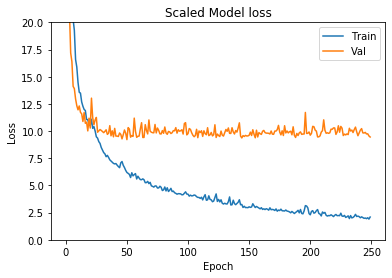

In [16]:
#Adapted from: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

plt.plot(boston_model_scaled.history['loss'])
plt.plot(boston_model_scaled.history['val_loss'])
plt.title('Scaled Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,20)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Accuracy of the scaled model

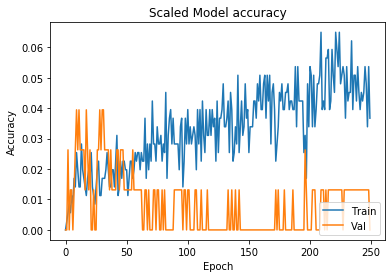

In [17]:
plt.plot(boston_model_scaled.history['accuracy'])
plt.plot(boston_model_scaled.history['val_accuracy'])
plt.title('Scaled Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Whitening the data

In [18]:
# Understanding PCA: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

# Initiating the PCA transform
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x_train_scaled)

# PCA of the the x train scaled subset
x_white_train = pd.DataFrame(pca.transform(x_train_scaled), columns=x.columns)

# PCA of the x test scaled subset
x_white_test = pd.DataFrame(pca.transform(x_test_scaled), columns=x.columns)

# PCA of the x validation scaled subset
x_white_val = pd.DataFrame(pca.transform(x_val_scaled), columns=x.columns)

#### Fit the whitened data to the model

In [19]:
boston_model_white = m.fit(x_white_train, y_train, epochs=250, batch_size=20, validation_data=(x_white_val,y_val))

Train on 354 samples, validate on 76 samples
Epoch 1/250
354/354 [==============================] - 0s 76us/step - loss: 120.3657 - accuracy: 0.0056 - val_loss: 32.9080 - val_accuracy: 0.0132
Epoch 2/250
354/354 [==============================] - 0s 70us/step - loss: 33.6590 - accuracy: 0.0141 - val_loss: 15.6835 - val_accuracy: 0.0132
Epoch 3/250
354/354 [==============================] - 0s 82us/step - loss: 20.7271 - accuracy: 0.0169 - val_loss: 14.1930 - val_accuracy: 0.0000e+00
Epoch 4/250
354/354 [==============================] - 0s 76us/step - loss: 14.3468 - accuracy: 0.0085 - val_loss: 11.4480 - val_accuracy: 0.0000e+00
Epoch 5/250
354/354 [==============================] - 0s 90us/step - loss: 11.8051 - accuracy: 0.0113 - val_loss: 10.6373 - val_accuracy: 0.0132
Epoch 6/250
354/354 [==============================] - 0s 82us/step - loss: 10.3959 - accuracy: 0.0169 - val_loss: 11.2350 - val_accuracy: 0.0132
Epoch 7/250
354/354 [==============================] - 0s 85us/step - 

Epoch 56/250
354/354 [==============================] - 0s 68us/step - loss: 1.9555 - accuracy: 0.0452 - val_loss: 9.8460 - val_accuracy: 0.0000e+00
Epoch 57/250
354/354 [==============================] - 0s 68us/step - loss: 1.8117 - accuracy: 0.0537 - val_loss: 10.1935 - val_accuracy: 0.0000e+00
Epoch 58/250
354/354 [==============================] - 0s 68us/step - loss: 1.8997 - accuracy: 0.0424 - val_loss: 10.0607 - val_accuracy: 0.0000e+00
Epoch 59/250
354/354 [==============================] - 0s 65us/step - loss: 1.8615 - accuracy: 0.0480 - val_loss: 9.9138 - val_accuracy: 0.0000e+00
Epoch 60/250
354/354 [==============================] - 0s 87us/step - loss: 1.7364 - accuracy: 0.0480 - val_loss: 9.7874 - val_accuracy: 0.0000e+00
Epoch 61/250
354/354 [==============================] - 0s 85us/step - loss: 1.7376 - accuracy: 0.0537 - val_loss: 10.1716 - val_accuracy: 0.0000e+00
Epoch 62/250
354/354 [==============================] - 0s 87us/step - loss: 1.6780 - accuracy: 0.0508 

354/354 [==============================] - 0s 96us/step - loss: 0.9459 - accuracy: 0.0819 - val_loss: 9.6440 - val_accuracy: 0.0000e+00
Epoch 112/250
354/354 [==============================] - 0s 93us/step - loss: 0.9052 - accuracy: 0.0678 - val_loss: 10.0135 - val_accuracy: 0.0132
Epoch 113/250
354/354 [==============================] - 0s 79us/step - loss: 0.8118 - accuracy: 0.0763 - val_loss: 9.9874 - val_accuracy: 0.0132
Epoch 114/250
354/354 [==============================] - 0s 85us/step - loss: 0.7830 - accuracy: 0.0960 - val_loss: 10.1022 - val_accuracy: 0.0132
Epoch 115/250
354/354 [==============================] - 0s 68us/step - loss: 0.7749 - accuracy: 0.0904 - val_loss: 9.8466 - val_accuracy: 0.0000e+00
Epoch 116/250
354/354 [==============================] - 0s 73us/step - loss: 0.7964 - accuracy: 0.0960 - val_loss: 9.6842 - val_accuracy: 0.0132
Epoch 117/250
354/354 [==============================] - 0s 73us/step - loss: 0.8046 - accuracy: 0.0989 - val_loss: 9.4343 - val

354/354 [==============================] - 0s 76us/step - loss: 0.4449 - accuracy: 0.1130 - val_loss: 9.7674 - val_accuracy: 0.0000e+00
Epoch 167/250
354/354 [==============================] - 0s 70us/step - loss: 0.4921 - accuracy: 0.1017 - val_loss: 10.1595 - val_accuracy: 0.0132
Epoch 168/250
354/354 [==============================] - 0s 68us/step - loss: 0.4861 - accuracy: 0.0989 - val_loss: 10.3807 - val_accuracy: 0.0000e+00
Epoch 169/250
354/354 [==============================] - 0s 65us/step - loss: 0.5759 - accuracy: 0.0904 - val_loss: 10.4472 - val_accuracy: 0.0000e+00
Epoch 170/250
354/354 [==============================] - 0s 70us/step - loss: 0.5482 - accuracy: 0.0904 - val_loss: 9.7910 - val_accuracy: 0.0263
Epoch 171/250
354/354 [==============================] - 0s 73us/step - loss: 0.5075 - accuracy: 0.0932 - val_loss: 10.8189 - val_accuracy: 0.0132
Epoch 172/250
354/354 [==============================] - 0s 70us/step - loss: 0.4535 - accuracy: 0.0932 - val_loss: 9.8516

Epoch 221/250
354/354 [==============================] - 0s 68us/step - loss: 0.2673 - accuracy: 0.1215 - val_loss: 10.9276 - val_accuracy: 0.0263
Epoch 222/250
354/354 [==============================] - 0s 79us/step - loss: 0.3135 - accuracy: 0.1186 - val_loss: 10.5643 - val_accuracy: 0.0263
Epoch 223/250
354/354 [==============================] - 0s 73us/step - loss: 0.2876 - accuracy: 0.1186 - val_loss: 10.7099 - val_accuracy: 0.0263
Epoch 224/250
354/354 [==============================] - 0s 73us/step - loss: 0.2694 - accuracy: 0.1130 - val_loss: 10.5271 - val_accuracy: 0.0132
Epoch 225/250
354/354 [==============================] - 0s 70us/step - loss: 0.2702 - accuracy: 0.1130 - val_loss: 10.5536 - val_accuracy: 0.0132
Epoch 226/250
354/354 [==============================] - 0s 73us/step - loss: 0.2765 - accuracy: 0.1215 - val_loss: 11.0649 - val_accuracy: 0.0263
Epoch 227/250
354/354 [==============================] - 0s 65us/step - loss: 0.2749 - accuracy: 0.1158 - val_loss: 10

#### Predict the the values of the test set using the scaled and whitened model

In [20]:
# Run each x_test_scaled value through the neural network. (Not using this currently but can print out the values of p_test_scaled_whitened if you want)
p_test_scaled_whitened = m.predict(x_white_test).round().T
#p_test_scaled_whitened
#y_test

#### Evaluate the whitened model

In [21]:
# Evaluate the prediction - The first element is the loss, the second element is the accuracy
Eval_white = m.evaluate(x_white_test, y_test)

# Print the Loss and Accuracy of the scaled model.
print("\nLoss is: ", Eval_white[0], "\nAccuracy is: ", Eval_white[1])


76/76 [==============================] - 0s 66us/step

Loss is:  14.602372721621865 
Accuracy is:  0.02631578966975212


### Determining whether Overfitting is occuring and determing the accuracy of the model (Scaled & Whitened  model)

#### Graphing the training loss vs the validation loss

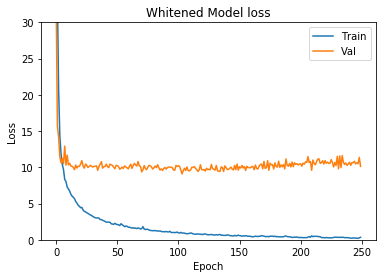

In [22]:
#Adapted from: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

plt.plot(boston_model_white.history['loss'])
plt.plot(boston_model_white.history['val_loss'])
plt.title('Whitened Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,30)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Accuracy of the whitened model

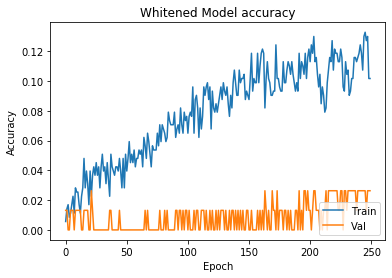

In [23]:
plt.plot(boston_model_white.history['accuracy'])
plt.plot(boston_model_white.history['val_accuracy'])
plt.title('Whitened Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()